## 📚 1. Import Library

Pada tahap awal kita memuat library dasar untuk:

- manipulasi data (pandas, numpy)
- visualisasi (matplotlib, seaborn)
- analisis numerik & statistik

Library ini akan digunakan selama proses EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 📂 2. Load Dataset

Dataset `data_integrated_long.csv` dimuat dari folder project.  
Setelah itu:

- Menampilkan 5 baris pertama
- Menampilkan jumlah baris dan kolom

In [2]:
df = pd.read_csv("./data/cleaned/data_integrated_long.csv")

print("Ukuran dataset :", df.shape)
df.head()

Ukuran dataset : (44204, 10)


,Kabupaten_Kota,Tahun,Kategori,Produk,Pengeluaran,Is_Total,Region,Kategori_Pengeluaran,Pengeluaran_Bulanan,Pengeluaran_Tahunan
0,Simeulue,2023,Buah,BUAH-BUAHAN,5287.59,True,Lainnya,Sangat Tinggi,21150.36,274954.68
1,Aceh Singkil,2023,Buah,BUAH-BUAHAN,7377.18,True,Aceh,Sangat Tinggi,29508.72,383613.36
2,Aceh Selatan,2023,Buah,BUAH-BUAHAN,4589.20,True,Aceh,Sangat Tinggi,18356.80,238638.40
3,Aceh Tenggara,2023,Buah,BUAH-BUAHAN,5381.60,True,Aceh,Sangat Tinggi,21526.40,279843.20
4,Aceh Timur,2023,Buah,BUAH-BUAHAN,5630.94,True,Aceh,Sangat Tinggi,22523.76,292808.88


## 🧾 3. Informasi Struktur Data

Melihat struktur dataset menggunakan:

- `df.info()` untuk tipe data, jumlah kolom, dan total non-null
- `df.describe()` untuk ringkasan statistik numerik

Tujuannya mengetahui komposisi awal dataset.

Pemeriksaan Missing Value

Tahap ini menghitung total nilai kosong pada tiap kolom menggunakan:



In [3]:
print("=== Informasi Dataset ===")
df.info()

print("\n=== Jumlah Missing Value ===")
display(df.isna().sum())

print("\n=== 5 Baris Pertama ===")
display(df.head())




=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44204 entries, 0 to 44203
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kabupaten_Kota        44204 non-null  object 
 1   Tahun                 44204 non-null  int64  
 2   Kategori              44204 non-null  object 
 3   Produk                44204 non-null  object 
 4   Pengeluaran           44204 non-null  float64
 5   Is_Total              44204 non-null  bool   
 6   Region                44204 non-null  object 
 7   Kategori_Pengeluaran  44204 non-null  object 
 8   Pengeluaran_Bulanan   44204 non-null  float64
 9   Pengeluaran_Tahunan   44204 non-null  float64
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 3.1+ MB

=== Jumlah Missing Value ===


Kabupaten_Kota          0
Tahun                   0
Kategori                0
Produk                  0
Pengeluaran             0
Is_Total                0
Region                  0
Kategori_Pengeluaran    0
Pengeluaran_Bulanan     0
Pengeluaran_Tahunan     0
dtype: int64


=== 5 Baris Pertama ===


,Kabupaten_Kota,Tahun,Kategori,Produk,Pengeluaran,Is_Total,Region,Kategori_Pengeluaran,Pengeluaran_Bulanan,Pengeluaran_Tahunan
0,Simeulue,2023,Buah,BUAH-BUAHAN,5287.59,True,Lainnya,Sangat Tinggi,21150.36,274954.68
1,Aceh Singkil,2023,Buah,BUAH-BUAHAN,7377.18,True,Aceh,Sangat Tinggi,29508.72,383613.36
2,Aceh Selatan,2023,Buah,BUAH-BUAHAN,4589.20,True,Aceh,Sangat Tinggi,18356.80,238638.40
3,Aceh Tenggara,2023,Buah,BUAH-BUAHAN,5381.60,True,Aceh,Sangat Tinggi,21526.40,279843.20
4,Aceh Timur,2023,Buah,BUAH-BUAHAN,5630.94,True,Aceh,Sangat Tinggi,22523.76,292808.88


## 🧩 5. Identifikasi Tipe Variabel

Dataset berisi dua tipe utama:

- **Kategori (object)**
- **Numerik (int/float)**

Tahap ini membagi kolom menjadi dua grup otomatis.

In [4]:
cat_columns = df.select_dtypes(include=["object"]).columns.tolist()
num_columns = df.select_dtypes(include=["float64","int64"]).columns.tolist()

print("Kolom kategori :", cat_columns)
print("Kolom numerik  :", num_columns[:10], "... (total", len(num_columns), ")")

Kolom kategori : ['Kabupaten_Kota', 'Kategori', 'Produk', 'Region', 'Kategori_Pengeluaran']
Kolom numerik  : ['Tahun', 'Pengeluaran', 'Pengeluaran_Bulanan', 'Pengeluaran_Tahunan'] ... (total 4 )


## 📊 6. Distribusi Kolom Kategori

Untuk setiap kolom non-numerik dibuat plot distribusi  
(misalnya jumlah kabupaten, tahun, atau label kategori).

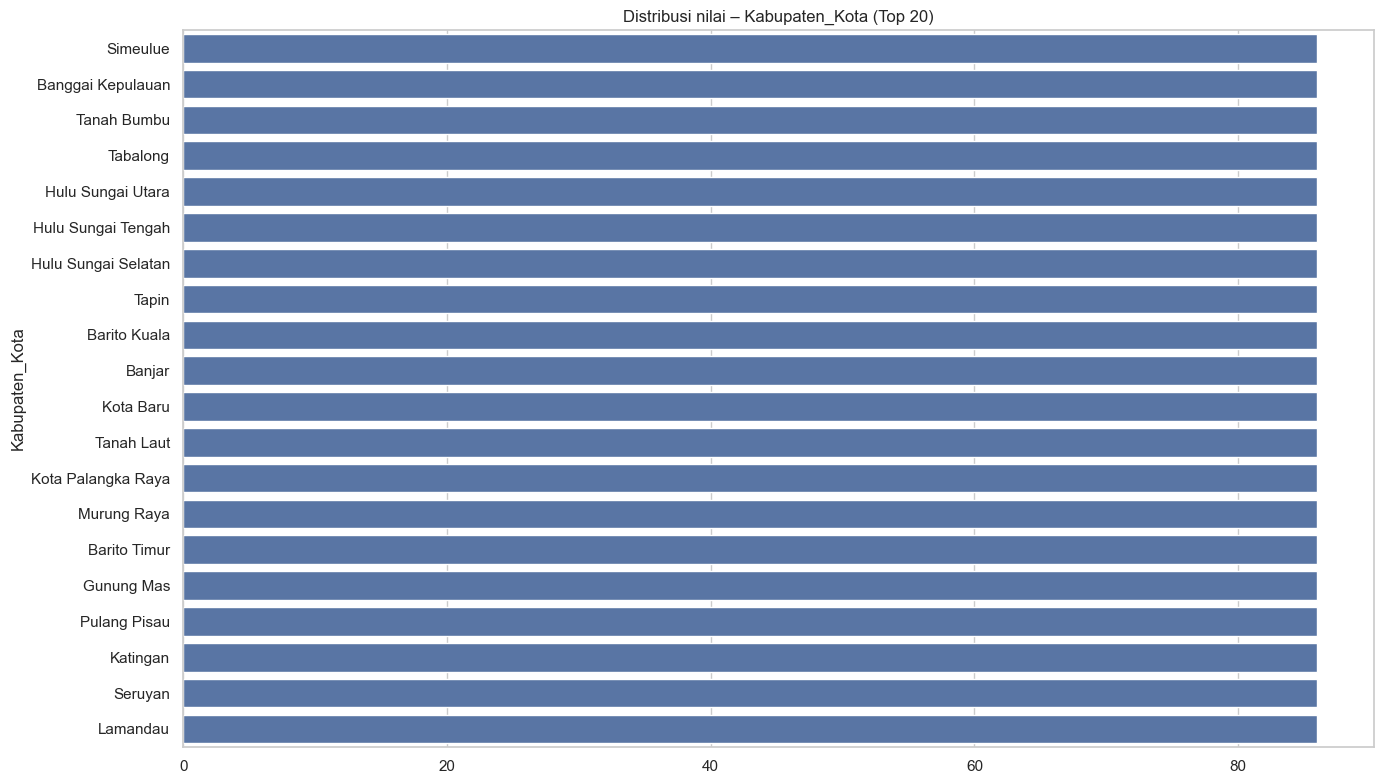

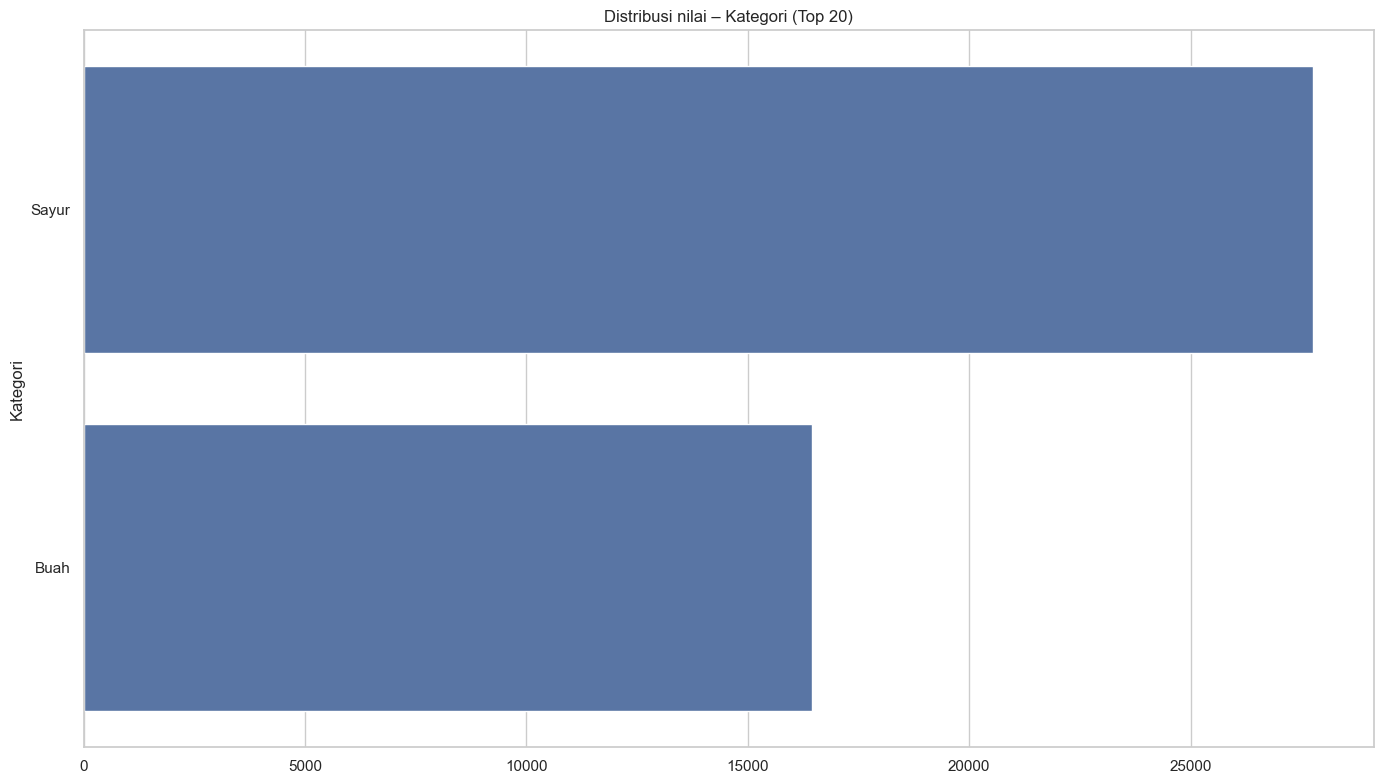

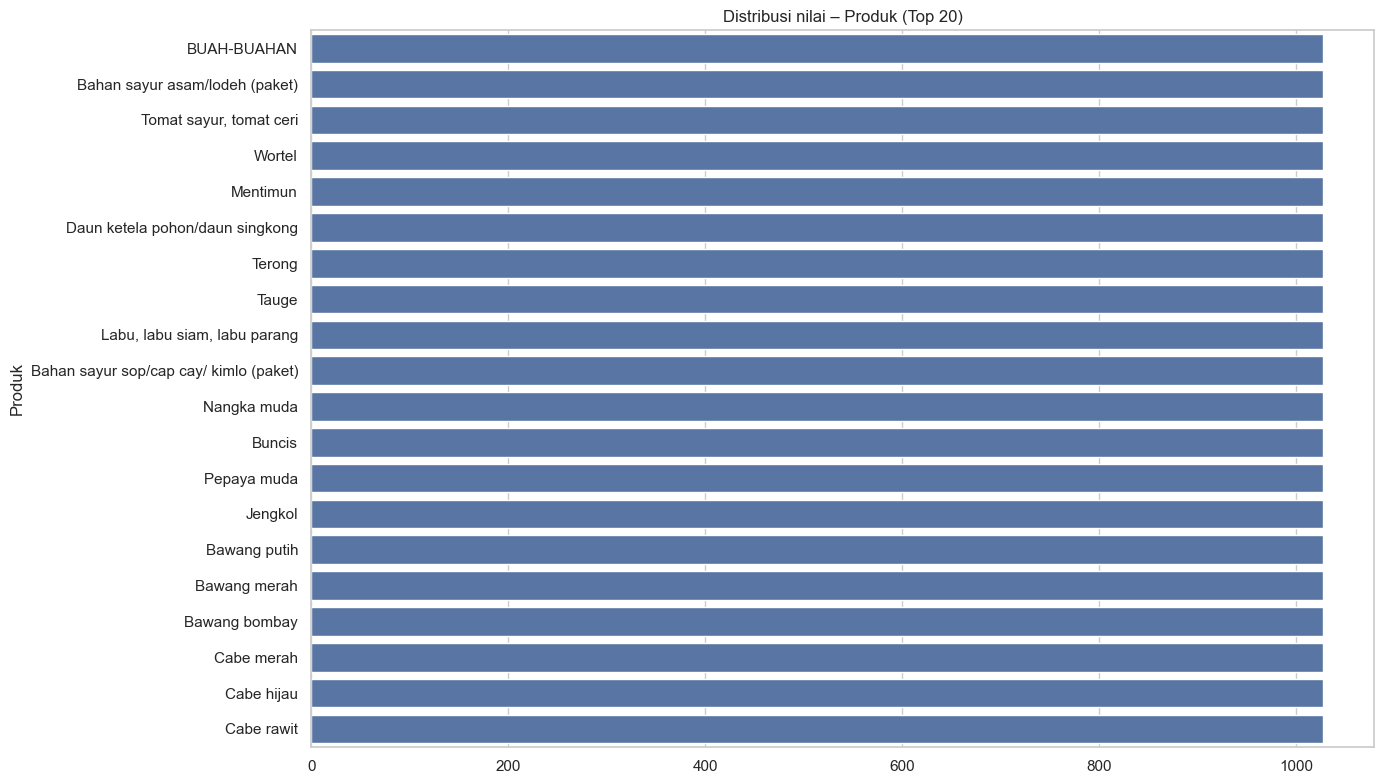

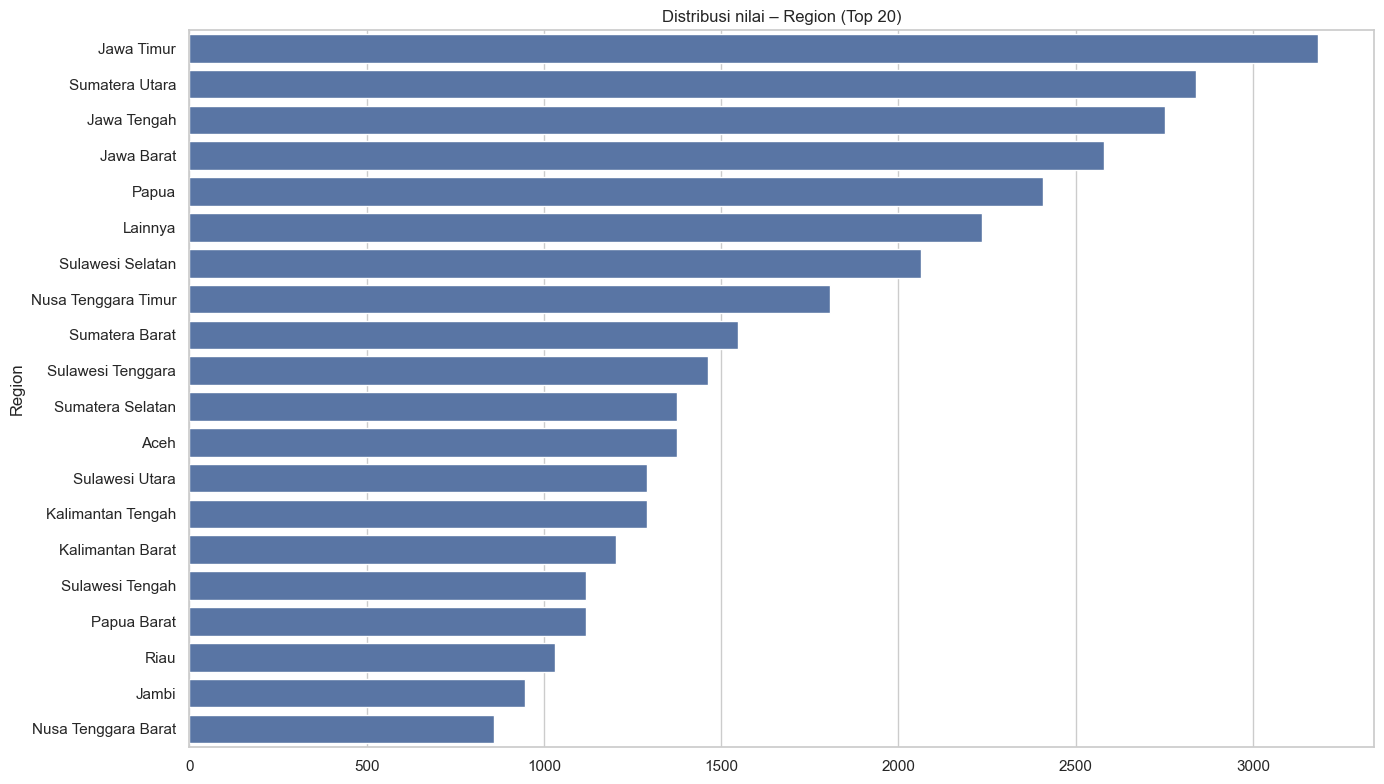

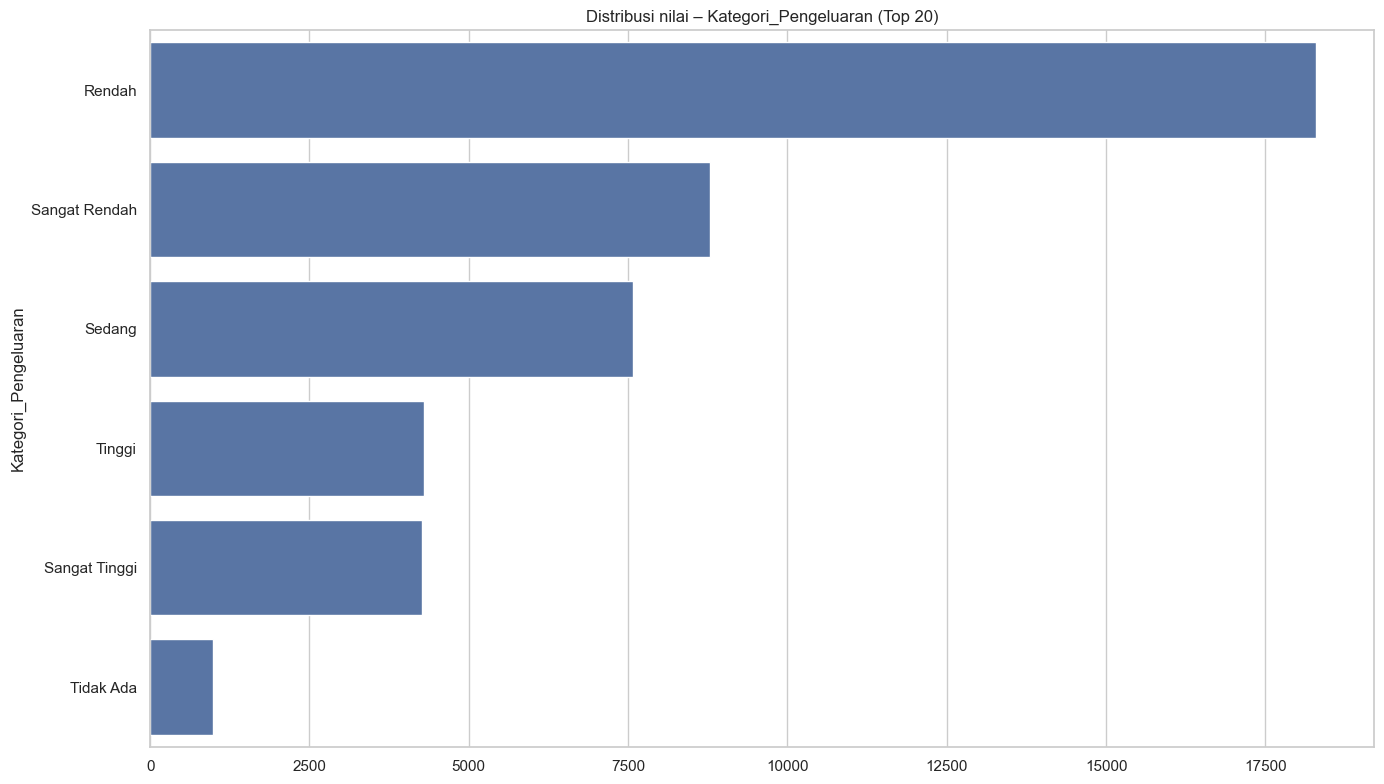

In [5]:
for col in cat_columns:
    plt.figure(figsize=(14,8))
    
    top_counts = df[col].value_counts().head(20)
    
    sns.barplot(
        x=top_counts.values,
        y=top_counts.index
    )
    
    plt.title(f"Distribusi nilai – {col} (Top 20)")
    plt.tight_layout()
    plt.show()

## 📈 7. Distribusi Variabel Numerik

Histogram membantu memahami:

- bentuk distribusi
- apakah data miring (skew)
- rentang nilai

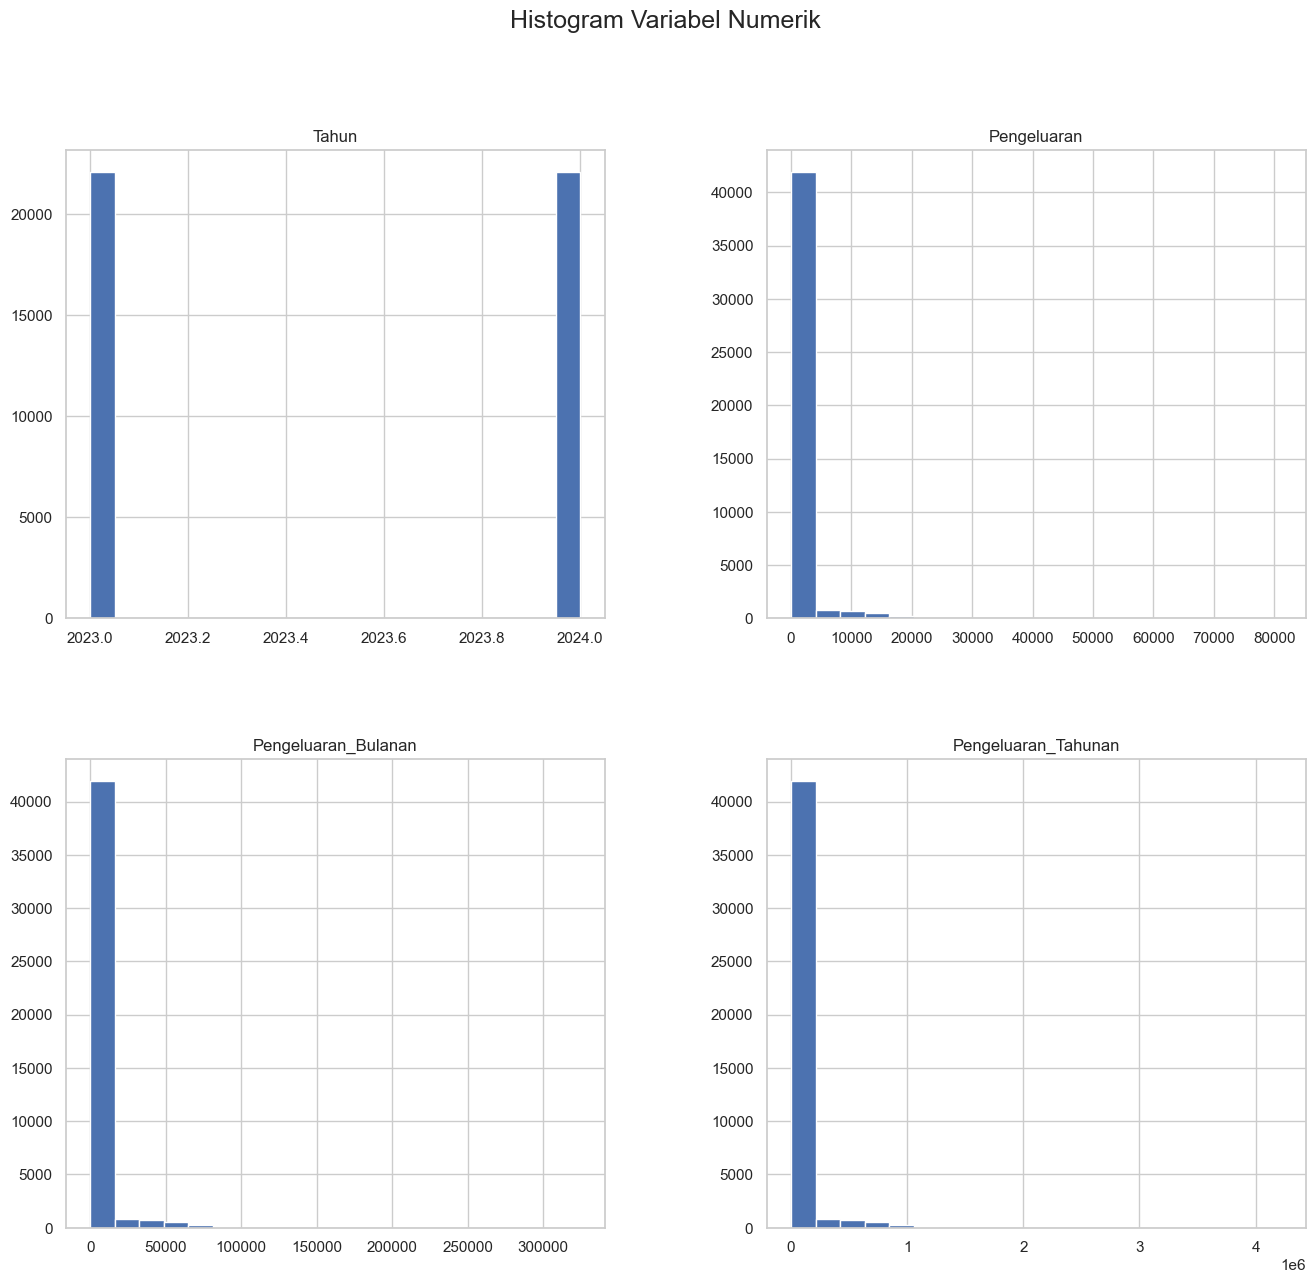

In [6]:
# Menghindari error: drop kolom non-numerik dahulu
df[num_columns].hist(bins=20, figsize=(16,14))
plt.suptitle("Histogram Variabel Numerik", fontsize=18)
plt.show()

## 📦 8. Boxplot Variabel Numerik

Boxplot membantu:

- mendeteksi outlier
- melihat persebaran kuartil

Untuk dataset besar hanya dipilih beberapa kolom pertama.

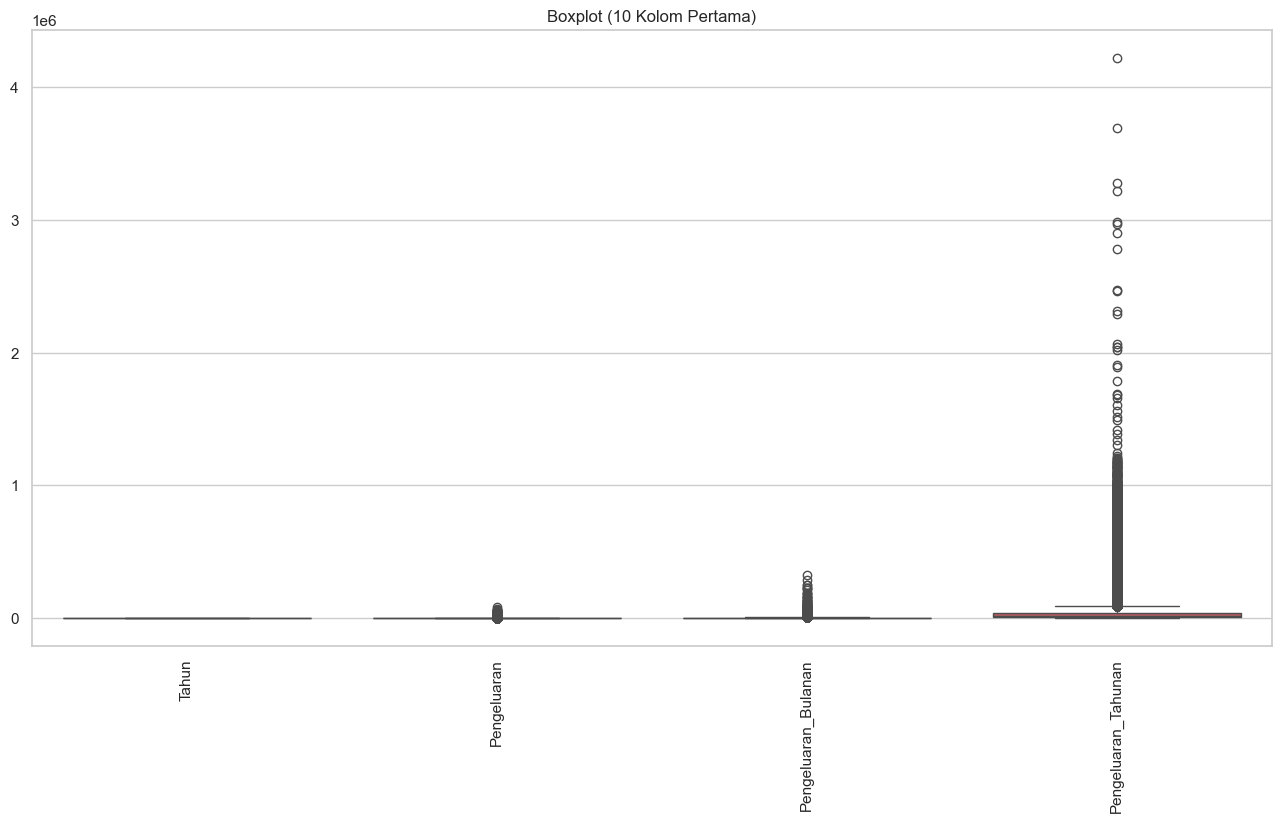

In [7]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df[num_columns].iloc[:, :10])
plt.title("Boxplot (10 Kolom Pertama)")
plt.xticks(rotation=90)
plt.show()

## 🔗 9. Analisis Korelasi Variabel Numerik

Heatmap digunakan untuk:

- Melihat variabel yang saling berkaitan kuat
- Identifikasi potensi multikolinearitas

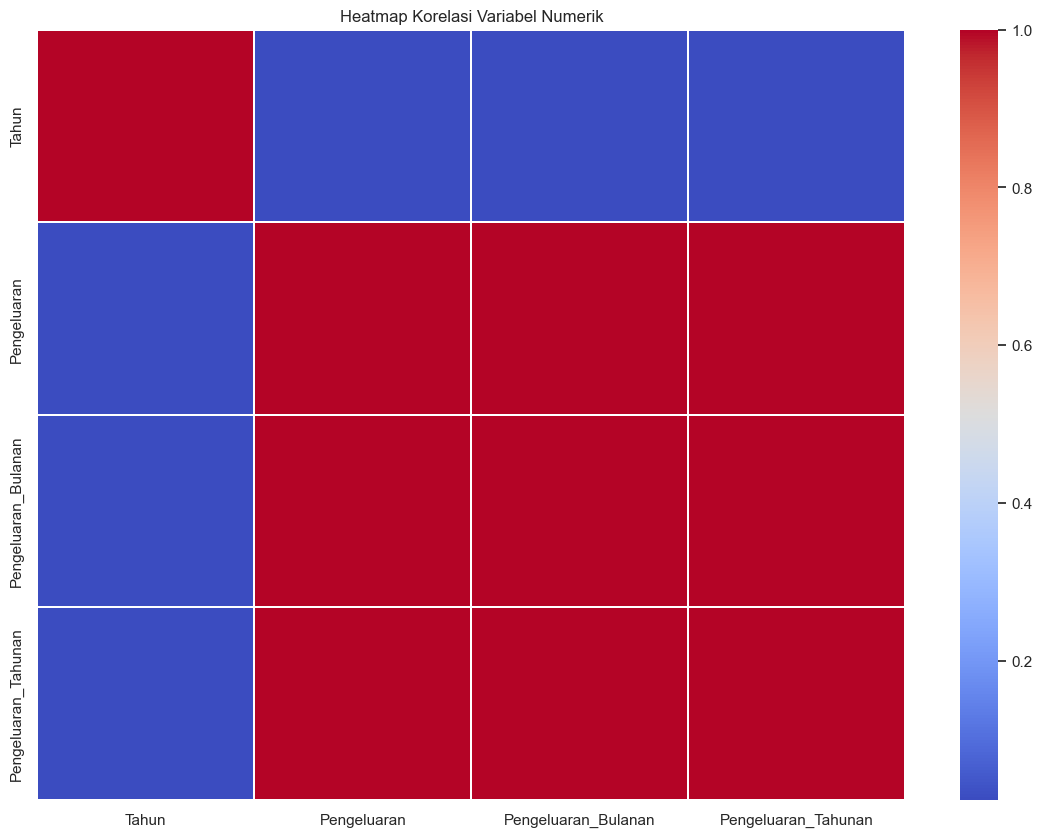

In [8]:
corr = df[num_columns].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.3)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

## 🏛️ 10. Analisis Distribusi Berdasarkan Kabupaten/Kota

Menampilkan total konsumsi semua komoditas per daerah  
untuk mengetahui daerah paling tinggi dan rendah.

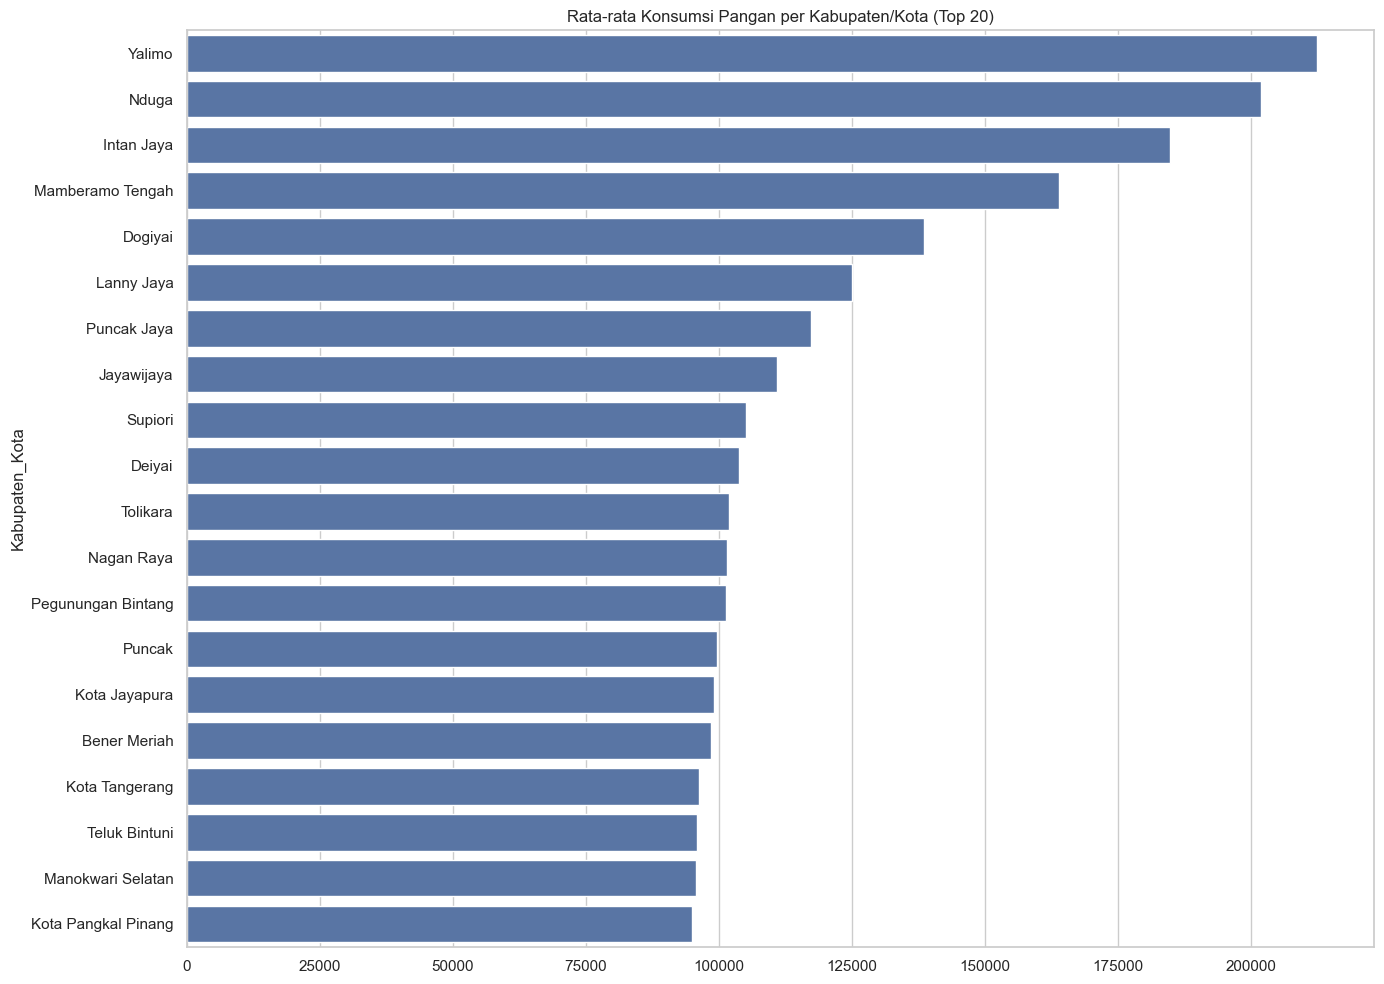

In [9]:
df["Total_Konsumsi"] = df[num_columns].sum(axis=1)

wilayah_rank = (
    df.groupby("Kabupaten_Kota")["Total_Konsumsi"]
      .mean()
      .sort_values(ascending=False)
      .head(20)     # ⬅ tampilkan hanya 20 teratas
)

plt.figure(figsize=(14,10))
sns.barplot(x=wilayah_rank.values, y=wilayah_rank.index)
plt.title("Rata-rata Konsumsi Pangan per Kabupaten/Kota (Top 20)")
plt.tight_layout()
plt.show()

## 🕒 11. Tren Konsumsi berdasarkan Tahun

Line plot ini digunakan untuk melihat:

- Apakah konsumsi meningkat atau menurun seiring waktu
- Perbandingan antar tahun

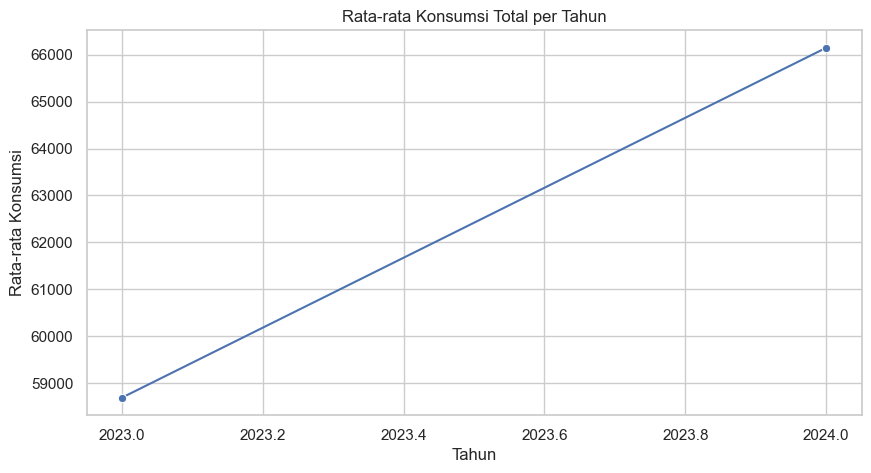

In [10]:
trend = df.groupby("Tahun")["Total_Konsumsi"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=trend.index, y=trend.values, marker="o")
plt.title("Rata-rata Konsumsi Total per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Konsumsi")
plt.show()